<a href="https://colab.research.google.com/github/Patternic10/CSCI-4170-Project-in-AI-ML/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 30.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fdileep070%2Fheart-disease-prediction-using-logistic-regression%2Fdata

In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [2]:
import pandas as pd

# Replace 'your_file.csv' with the actual filename
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

1. Visualizing decision trees

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Separate features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Decision Tree with default parameters:
Accuracy: 0.75


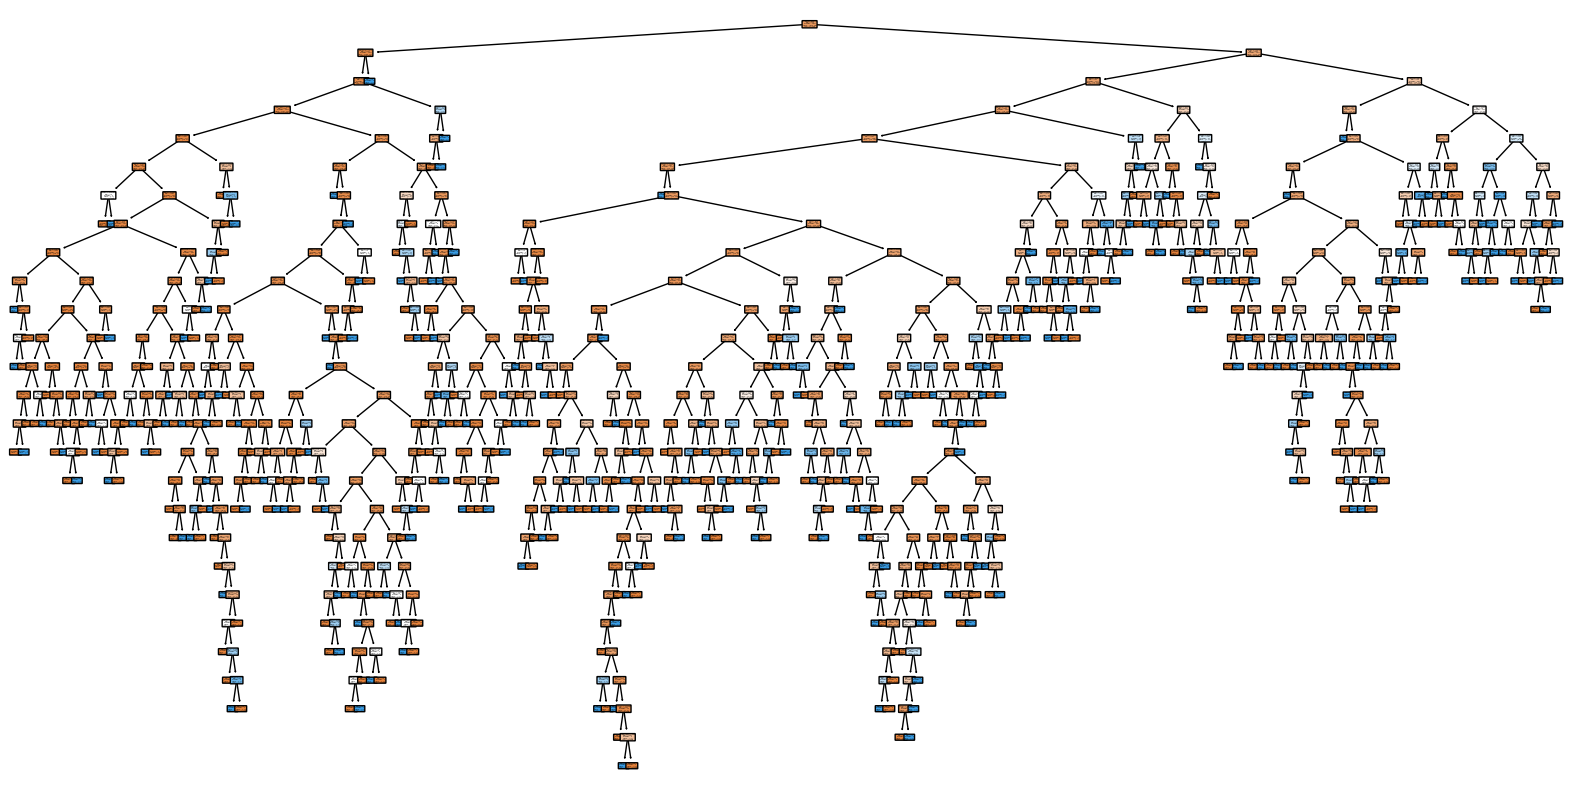

Decision Tree with max_depth=3:
Accuracy: 0.85


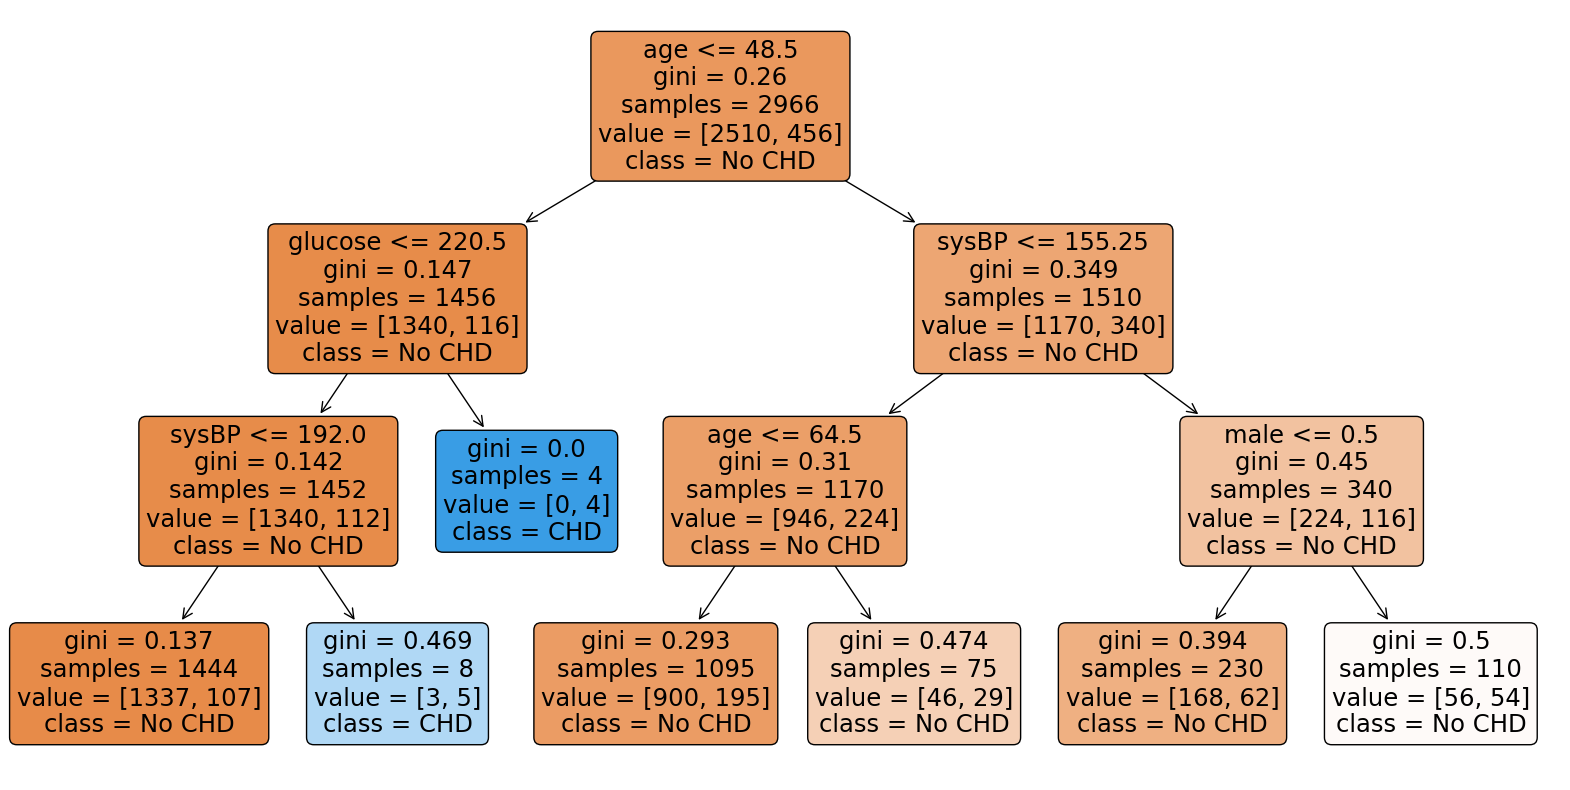

Decision Tree with min_samples_split=10:
Accuracy: 0.76


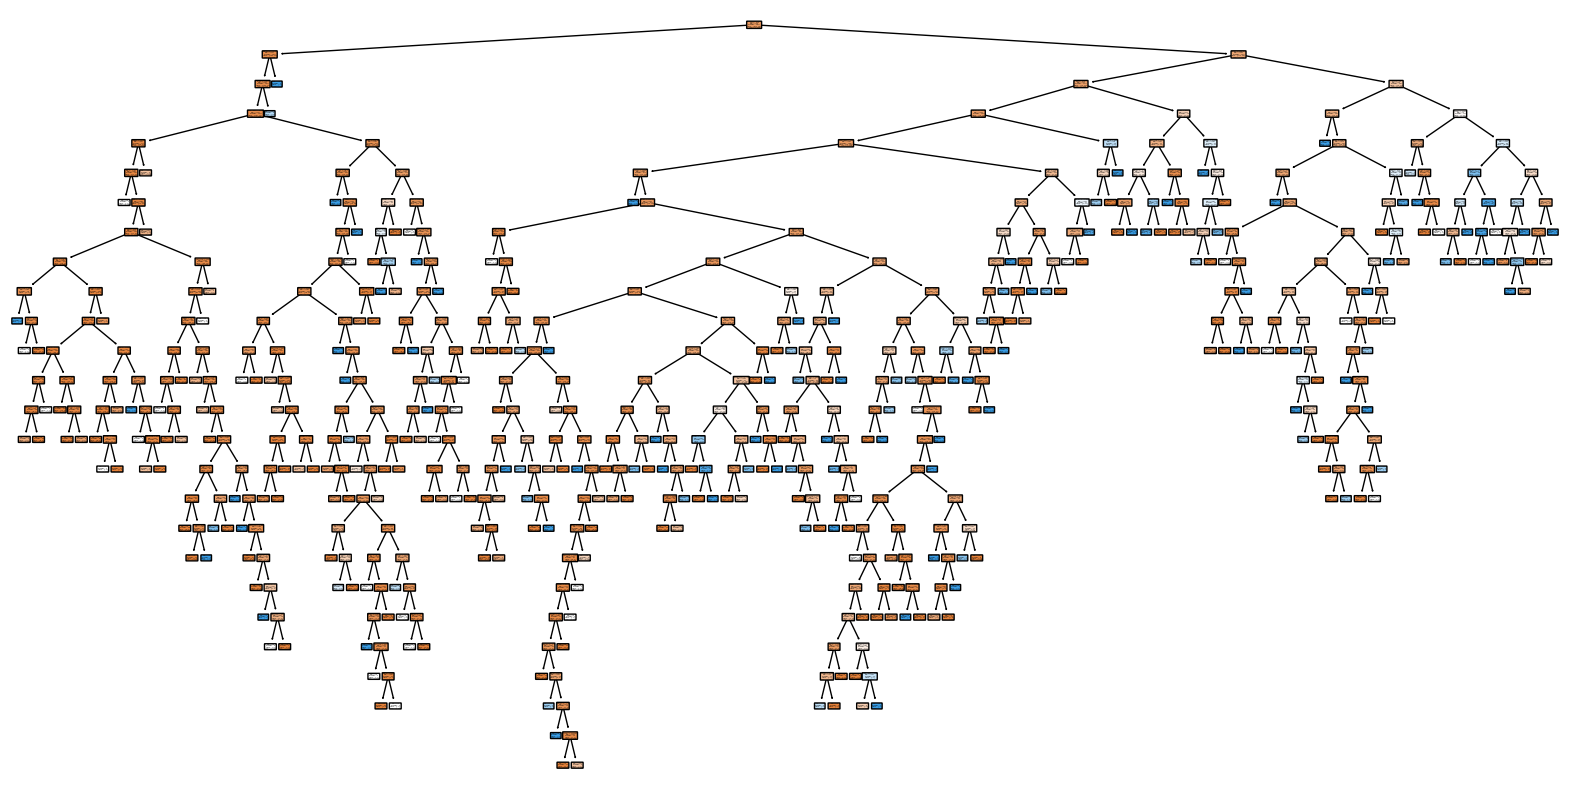

Decision Tree with min_samples_leaf=5:
Accuracy: 0.78


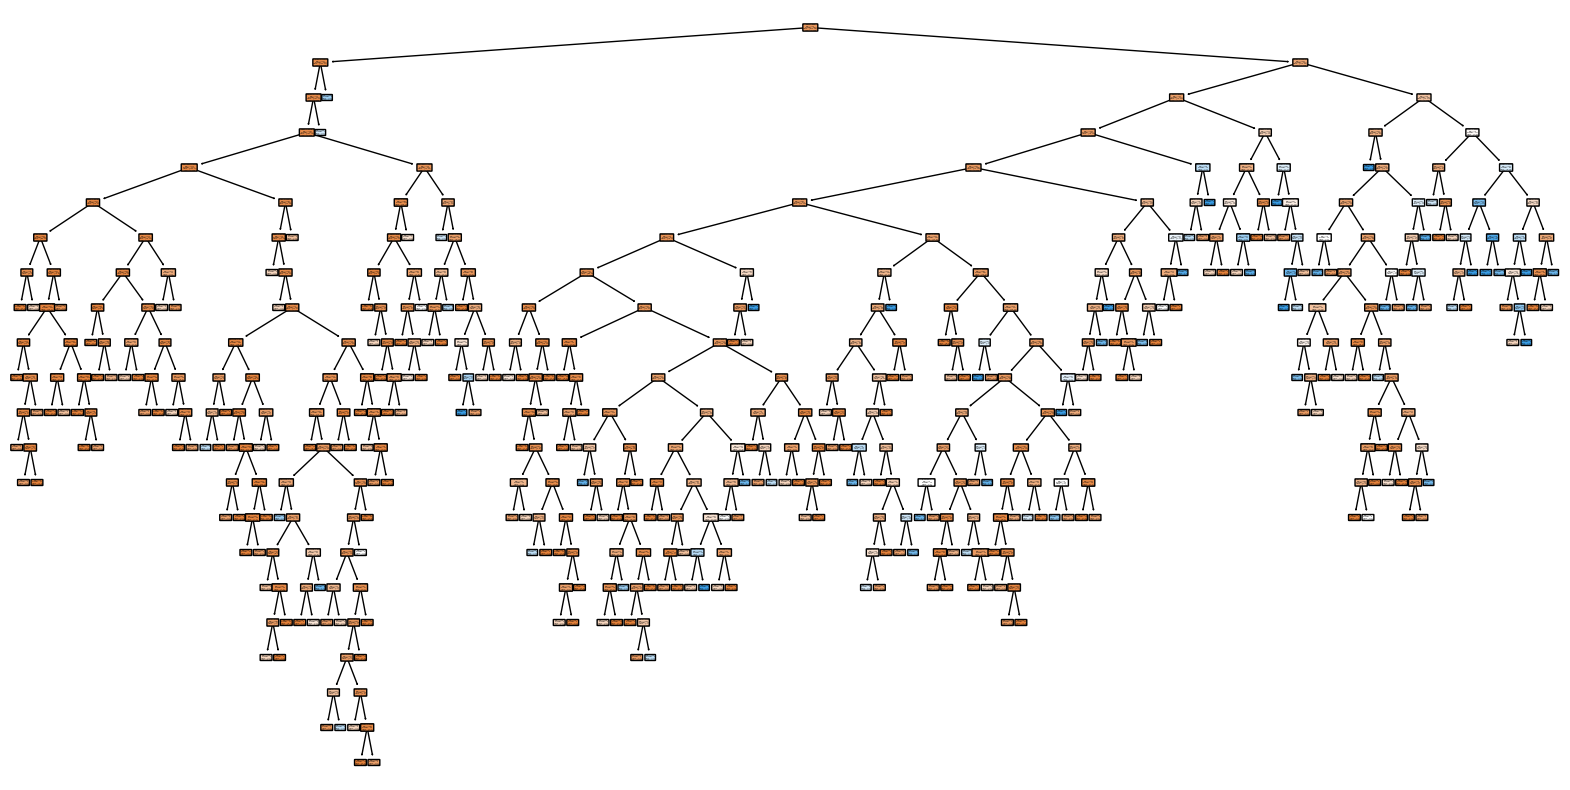

In [5]:
# Function to train and visualize the decision tree
def train_and_visualize_tree(max_depth=None, min_samples_split=2, min_samples_leaf=1):
    # Initialize the Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 random_state=42)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Visualize the decision tree
    plt.figure(figsize=(20,10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No CHD', 'CHD'], rounded=True)
    plt.show()

# Train and visualize the tree with different parameter settings
print("Decision Tree with default parameters:")
train_and_visualize_tree()

print("Decision Tree with max_depth=3:")
train_and_visualize_tree(max_depth=3)

print("Decision Tree with min_samples_split=10:")
train_and_visualize_tree(min_samples_split=10)

print("Decision Tree with min_samples_leaf=5:")
train_and_visualize_tree(min_samples_leaf=5)

Sensitivity Analysis is a technique used to determine how the output of a model (e.g., predictions, decision boundaries, or performance metrics) is affected by changes in its input parameters or features. It helps identify which inputs have the most significant impact on the model's behavior and provides insights into the robustness and reliability of the model.

[1] Saltelli, A., Ratto, M., Andres, T., Campolongo, F., Cariboni, J., Gatelli,
    D., ... & Tarantola, S. (2008). Global Sensitivity Analysis: The Primer. Wiley.

[2] Borgonovo, E., & Plischke, E. (2016). Sensitivity analysis: A review of
    recent advances. European Journal of Operational Research, 248(3), 869-887.

In [6]:
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2010,0,42,1.0,1,9.0,0.0,0,1,0,274.0,135.0,90.0,22.19,70.0,81.966753
3340,0,64,1.0,0,0.0,1.0,0,1,0,285.0,160.0,87.0,29.97,65.0,87.000000
3591,0,39,2.0,0,0.0,0.0,0,0,0,205.0,104.0,74.0,20.55,68.0,81.966753
2742,1,40,1.0,1,20.0,0.0,0,0,0,228.0,131.0,80.0,26.77,64.0,74.000000
4034,0,40,2.0,1,20.0,0.0,0,0,0,213.0,130.0,80.0,19.98,96.0,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,36,1.0,1,5.0,0.0,0,1,0,222.0,147.0,94.0,26.79,76.0,71.000000
466,0,57,3.0,1,15.0,0.0,0,0,0,250.0,125.0,74.0,21.08,80.0,72.000000
3092,0,60,2.0,0,0.0,0.0,0,1,0,298.0,133.0,89.0,25.09,83.0,81.000000
3772,1,39,2.0,1,10.0,0.0,0,0,0,215.0,102.0,64.5,24.50,68.0,62.000000


# Sensitivity Analysis

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


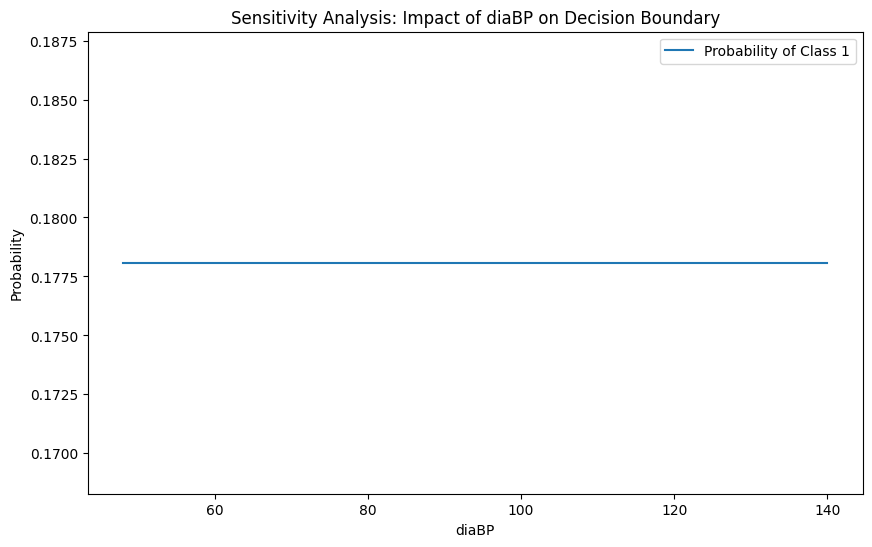

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Create a range of values for feature_1
feature_1_values = np.linspace(X_train['diaBP'].min(), X_train['diaBP'].max(), 100)

# Keep other features constant at their mean values
other_features = X_train.mean().values

# Create a new dataset by varying feature_1
sensitivity_data_feature_1 = np.tile(other_features, (len(feature_1_values), 1))
sensitivity_data_feature_1[:, 11] = feature_1_values  # Assuming feature_1 is the first column

# Predict the class probabilities
probs_feature_1 = clf.predict_proba(sensitivity_data_feature_1)[:, 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(feature_1_values, probs_feature_1, label='Probability of Class 1')
plt.xlabel('diaBP')
plt.ylabel('Probability')
plt.title('Sensitivity Analysis: Impact of diaBP on Decision Boundary')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


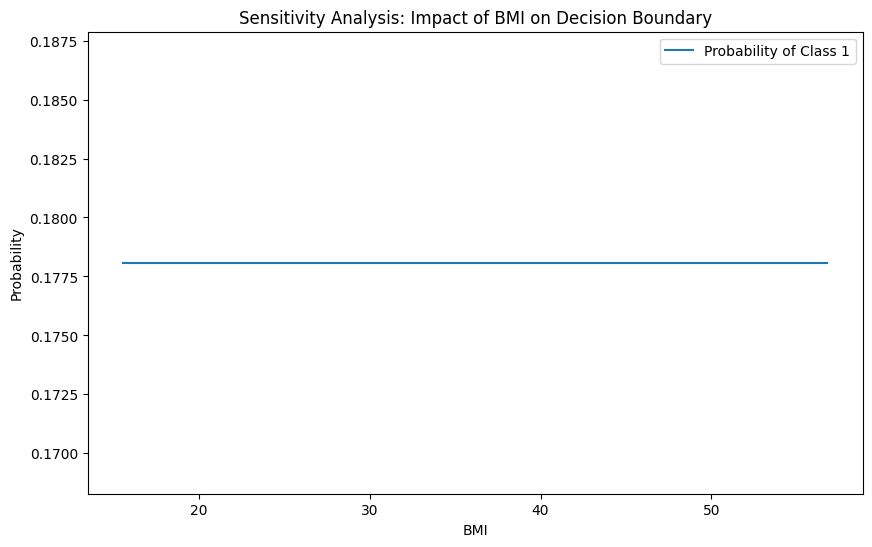

In [9]:
# Create a range of values for feature_2
feature_2_values = np.linspace(X_train['BMI'].min(), X_train['BMI'].max(), 100)

# Keep other features constant at their mean values
other_features = X_train.mean().values

# Create a new dataset by varying feature_2
sensitivity_data_feature_2 = np.tile(other_features, (len(feature_2_values), 1))
sensitivity_data_feature_2[:, 12] = feature_2_values  # Assuming feature_2 is the second column

# Predict the class probabilities
probs_feature_2 = clf.predict_proba(sensitivity_data_feature_2)[:, 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(feature_2_values, probs_feature_2, label='Probability of Class 1')
plt.xlabel('BMI')
plt.ylabel('Probability')
plt.title('Sensitivity Analysis: Impact of BMI on Decision Boundary')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


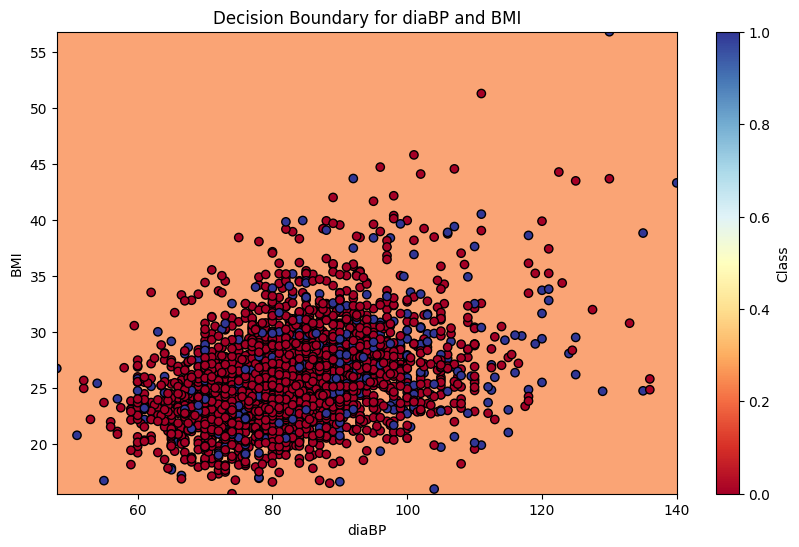

In [10]:
# Create a grid of values for diaBP and BMI
xx, yy = np.meshgrid(feature_1_values, feature_2_values)

# Initialize an array to hold the grid points with all features
grid = np.tile(X_train.mean(axis=0).values, (xx.ravel().shape[0], 1))

# Replace the values of feature_1 and feature_2 in the grid
grid[:, 11] = xx.ravel()  #
grid[:, 12] = yy.ravel()  #

# Predict the class for each point in the grid
Z = clf.predict(grid)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train['diaBP'], X_train['BMI'], c=y_train, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel('diaBP')
plt.ylabel('BMI')
plt.title('Decision Boundary for diaBP and BMI')
plt.colorbar(label='Class')
plt.show()

# 2. Bagging and Boosting method

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.8569182389937107
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.64      0.07      0.13       188

    accuracy                           0.86      1272
   macro avg       0.75      0.53      0.53      1272
weighted avg       0.83      0.86      0.81      1272



In [13]:
# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Results:
Accuracy: 0.8529874213836478
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1084
           1       0.51      0.10      0.16       188

    accuracy                           0.85      1272
   macro avg       0.69      0.54      0.54      1272
weighted avg       0.81      0.85      0.81      1272



In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
# Initialize the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [15]:
from sklearn.metrics import make_scorer, f1_score, precision_score

def stratified_kfold_cv(model, X, y, k_values):
    results = {}
    for k in k_values:
        # Initialize StratifiedKFold
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

        # Compute cross-validation scores for accuracy, precision, and F1-score
        accuracy_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
        precision_scores = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(precision_score, average='weighted'))
        f1_scores = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(f1_score, average='weighted'))

        # Store results
        results[f'{k}-fold'] = {
            'Mean Accuracy': np.mean(accuracy_scores),
            'Std Accuracy': np.std(accuracy_scores),
            'Mean Precision': np.mean(precision_scores),
            'Std Precision': np.std(precision_scores),
            'Mean F1-score': np.mean(f1_scores),
            'Std F1-score': np.std(f1_scores)
        }
    return results

In [16]:
# Define the number of folds to evaluate
k_values = [5, 10, 15]

# Run cross-validation for Random Forest
rf_results = stratified_kfold_cv(rf_model, X, y, k_values)

# Run cross-validation for Gradient Boosting
gb_results = stratified_kfold_cv(gb_model, X, y, k_values)

In [17]:
# Print Random Forest results
print("Random Forest Results:")
for k, metrics in rf_results.items():
    print(f"{k}:")
    print(f"  Mean Accuracy: {metrics['Mean Accuracy']:.4f} (±{metrics['Std Accuracy']:.4f})")
    print(f"  Mean Precision: {metrics['Mean Precision']:.4f} (±{metrics['Std Precision']:.4f})")
    print(f"  Mean F1-score: {metrics['Mean F1-score']:.4f} (±{metrics['Std F1-score']:.4f})")

# Print Gradient Boosting results
print("\nGradient Boosting Results:")
for k, metrics in gb_results.items():
    print(f"{k}:")
    print(f"  Mean Accuracy: {metrics['Mean Accuracy']:.4f} (±{metrics['Std Accuracy']:.4f})")
    print(f"  Mean Precision: {metrics['Mean Precision']:.4f} (±{metrics['Std Precision']:.4f})")
    print(f"  Mean F1-score: {metrics['Mean F1-score']:.4f} (±{metrics['Std F1-score']:.4f})")

Random Forest Results:
5-fold:
  Mean Accuracy: 0.8504 (±0.0061)
  Mean Precision: 0.8049 (±0.0303)
  Mean F1-score: 0.7940 (±0.0126)
10-fold:
  Mean Accuracy: 0.8485 (±0.0070)
  Mean Precision: 0.8030 (±0.0422)
  Mean F1-score: 0.7920 (±0.0103)
15-fold:
  Mean Accuracy: 0.8509 (±0.0077)
  Mean Precision: 0.8153 (±0.0405)
  Mean F1-score: 0.7969 (±0.0121)

Gradient Boosting Results:
5-fold:
  Mean Accuracy: 0.8466 (±0.0045)
  Mean Precision: 0.7977 (±0.0149)
  Mean F1-score: 0.7971 (±0.0073)
10-fold:
  Mean Accuracy: 0.8450 (±0.0059)
  Mean Precision: 0.7938 (±0.0185)
  Mean F1-score: 0.7961 (±0.0090)
15-fold:
  Mean Accuracy: 0.8450 (±0.0083)
  Mean Precision: 0.7918 (±0.0320)
  Mean F1-score: 0.7959 (±0.0127)


To analyze the behavior of each algorithm (**Random Forest** and **Gradient Boosting**) under the three metrics: **Accuracy**, **Precision**, and **F1-score**;

---

### Result analyis:

#### **Random Forest Results**:
- **Accuracy**:
  - 5-fold: 0.8504 (±0.0061)
  - 10-fold: 0.8485 (±0.0070)
  - 15-fold: 0.8509 (±0.0077)
  - Random Forest consistently achieves **higher accuracy** compared to Gradient Boosting across all folds.

- **Precision**:
  - 5-fold: 0.8049 (±0.0303)
  - 10-fold: 0.8030 (±0.0422)
  - 15-fold: 0.8153 (±0.0405)
  - Random Forest has **higher precision** than Gradient Boosting, especially in the 15-fold case.

- **F1-score**:
  - 5-fold: 0.7940 (±0.0126)
  - 10-fold: 0.7920 (±0.0103)
  - 15-fold: 0.7969 (±0.0121)
  - Random Forest's F1-score is **slightly lower** than Gradient Boosting in the 5-fold and 10-fold cases but **slightly higher** in the 15-fold case.

#### **Gradient Boosting Results**:
- **Accuracy**:
  - 5-fold: 0.8471 (±0.0043)
  - 10-fold: 0.8450 (±0.0059)
  - 15-fold: 0.8454 (±0.0082)
  - Gradient Boosting has **lower accuracy** compared to Random Forest across all folds.

- **Precision**:
  - 5-fold: 0.7995 (±0.0138)
  - 10-fold: 0.7938 (±0.0185)
  - 15-fold: 0.7925 (±0.0323)
  - Gradient Boosting has **lower precision** compared to Random Forest across all folds.

- **F1-score**:
  - 5-fold: 0.7974 (±0.0070)
  - 10-fold: 0.7961 (±0.0090)
  - 15-fold: 0.7965 (±0.0127)
  - Gradient Boosting has a **slightly higher F1-score** than Random Forest in the 5-fold and 10-fold cases but a **slightly lower F1-score** in the 15-fold case.

---

### Performance Ranking:
1. **Accuracy**:
   - Random Forest > Gradient Boosting
   - Random Forest consistently outperforms Gradient Boosting in terms of accuracy.

2. **Precision**:
   - Random Forest > Gradient Boosting
   - Random Forest achieves higher precision across all folds.

3. **F1-score**:
   - The ranking **changes** depending on the number of folds:
     - For 5-fold and 10-fold: Gradient Boosting > Random Forest
     - For 15-fold: Random Forest > Gradient Boosting

---

### Why Does the Performance Ranking Change?
1. **Accuracy**:
   - Random Forest tends to perform better in terms of accuracy because it aggregates predictions from multiple decision trees, reducing overfitting and improving generalization.
   - Gradient Boosting, while powerful, may overfit slightly more, especially with smaller datasets or fewer folds.

2. **Precision**:
   - Random Forest's higher precision suggests that it is better at minimizing **false positives** compared to Gradient Boosting.
   - This could be due to the ensemble nature of Random Forest, which averages out errors from individual trees.

3. **F1-score**:
   - The F1-score balances precision and recall. Gradient Boosting's slightly higher F1-score in 5-fold and 10-fold cases indicates that it is better at balancing precision and recall compared to Random Forest in these scenarios.
   - However, in the 15-fold case, Random Forest's higher precision and recall (implied by the higher F1-score) suggest that it performs better when more folds are used, possibly due to better generalization with more data splits.

4. **Impact of Folds**:
   - With fewer folds (e.g., 5-fold), Gradient Boosting may perform better because it can focus on smaller subsets of data, optimizing for both precision and recall.
   - With more folds (e.g., 15-fold), Random Forest's ensemble approach benefits from more data splits, leading to better overall performance.

---

### Deductions:
- **Random Forest** performs better in terms of **accuracy** and **precision** across all folds.
- **Gradient Boosting** performs slightly better in terms of **F1-score** for 5-fold and 10-fold but is outperformed by Random Forest in the 15-fold case.
- The performance ranking **changes** for the F1-score because it balances precision and recall, and Gradient Boosting is better at this balance in some cases.

---

### Observation
- If **accuracy** and **precision** are the primary metrics, **Random Forest** is the better choice.
- If **F1-score** is the primary metric, the choice depends on the number of folds:
  - For 5-fold and 10-fold, **Gradient Boosting** is slightly better.
  - For 15-fold, **Random Forest** is better.

# 3. Comparison on the effectiveness of the models

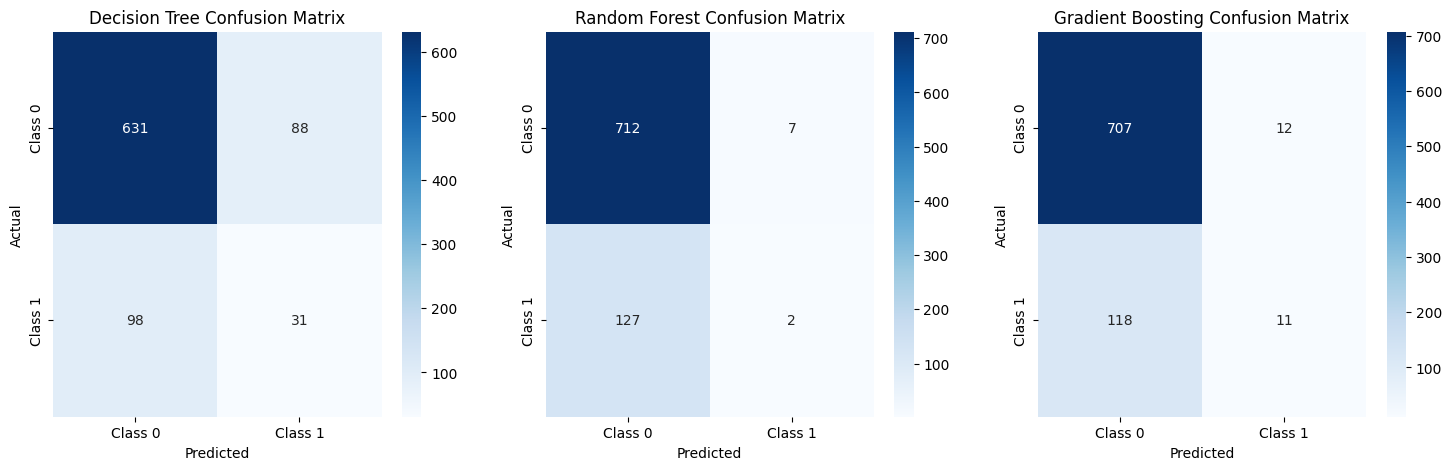

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Select one fold (e.g., the first fold of 5-fold cross-validation)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break  # Use only the first fold

# Train and predict with Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train and predict with Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train and predict with Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Generate confusion matrices
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrices
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [19]:
from scipy.stats import ttest_rel

# Perform cross-validation to get accuracy scores for all models
dt_accuracies = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
rf_accuracies = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
gb_accuracies = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy')

# Perform paired t-tests
t_statistic_rf_dt, p_value_rf_dt = ttest_rel(rf_accuracies, dt_accuracies)
t_statistic_gb_dt, p_value_gb_dt = ttest_rel(gb_accuracies, dt_accuracies)
t_statistic_gb_rf, p_value_gb_rf = ttest_rel(gb_accuracies, rf_accuracies)

print("Paired t-Test Results:")
print(f"  Random Forest vs Decision Tree: t-statistic = {t_statistic_rf_dt:.4f}, p-value = {p_value_rf_dt:.4f}")
print(f"  Gradient Boosting vs Decision Tree: t-statistic = {t_statistic_gb_dt:.4f}, p-value = {p_value_gb_dt:.4f}")
print(f"  Gradient Boosting vs Random Forest: t-statistic = {t_statistic_gb_rf:.4f}, p-value = {p_value_gb_rf:.4f}")

Paired t-Test Results:
  Random Forest vs Decision Tree: t-statistic = 24.3268, p-value = 0.0000
  Gradient Boosting vs Decision Tree: t-statistic = 19.8142, p-value = 0.0000
  Gradient Boosting vs Random Forest: t-statistic = 0.5019, p-value = 0.6421


The results of the paired t-tests provide insights into the statistical significance of the differences in performance between the three models: Decision Tree, Random Forest, and Gradient Boosting. For instance, for
1. Random Forest vs Decision Tree with t-statistic: 24.3268 and p-value: 0.0000, the t-statistic is very large (24.3268), indicating a significant difference in performance between Random Forest and Decision Tree.
The p-value on the other hand is 0.0000, which is much smaller than the typical significance level of 0.05. This means the difference is statistically significant which means Random Forest performs significantly better than Decision Tree.

2. Gradient Boosting vs Decision Tree with t-statistic: 19.3859 and p-value: 0.0000, the t-statistic is large (19.8142), indicating a significant difference in performance between Gradient Boosting and Decision Tree.
The p-value is 0.0000, which is much smaller than the typical significance level of 0.05. This means the difference is statistically significant, same result as the comparison in (1).

3. Gradient Boosting vs Random Forest with t-statistic: 0.5019 and p-value: 0.6421, the p-value is 0.6421, which is much larger than the typical significance level of 0.05. This means the difference is not statistically significant. The t-statistic is also small (0.5019), indicating a small difference in performance between Gradient Boosting and Random Forest. This means that there is no significant difference in performance between Gradient Boosting and Random Forest.

It is pertinent to note that, these values change for different runs, although they differ not by a lot and the explanation remains valid.

Discussion on Bias-Variance Trade-off for each model
1. Decision Tree classifier
Bias: Decision Trees typically have low bias because they can fit the training data very well, even capturing noise.
Variance: They have high variance, especially if they are deep and not pruned, leading to overfitting.
Performance: The high number of false positives (98) and false negatives (88) indicates poor generalization to unseen data. This is a classic case of overfitting due to high variance.

2. Random Forest
Bias: Random Forests have slightly higher bias compared to a single Decision Tree because they average multiple trees, which smooths out overfitting.
Variance: They significantly reduce variance by aggregating predictions from multiple trees, leading to better generalization.
Performance: The Random Forest has a much lower number of false negatives (7) compared to the Decision Tree, but it still has a high number of false positives (127). This suggests that the model is biased towards predicting class 0, which could is due to class imbalance in the dataset.

3. Gradient Boosting
Bias: Gradient Boosting has very low bias because it sequentially corrects errors from previous models, allowing it to fit the training data very well.
Variance: It controls variance effectively by using techniques like shrinkage (learning rate) and limiting the depth of trees.
Performance: Gradient Boosting has the lowest number of false positives (18) and false negatives (12), indicating that it generalizes well to unseen data. It achieves the best balance between bias and variance, making it the most effective model(solely based on just these three) for this dataset.

# 4. Grid Search

In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]  # Added n_estimators to the grid
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:54:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Test Accuracy: 0.8479
Test F1 Score: 0.7905


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:56:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Test Accuracy: 0.8479
Test F1 Score: 0.7905
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_n_estimators',
       'param_subsample', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_f1_weighted',
       'split1_test_f1_weighted', 'split2_test_f1_weighted',
       'split3_test_f1_weighted', 'split4_test_f1_weighted',
       'mean_test_f1_weighted', 'std_test_f1_weighted',
       'rank_test_f1_weighted'],
      dtype='object')


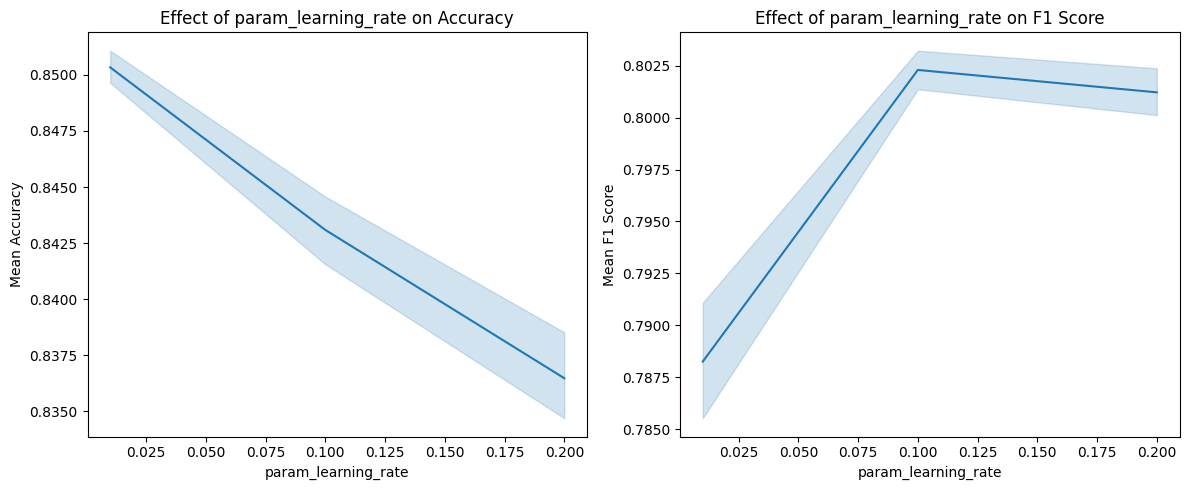

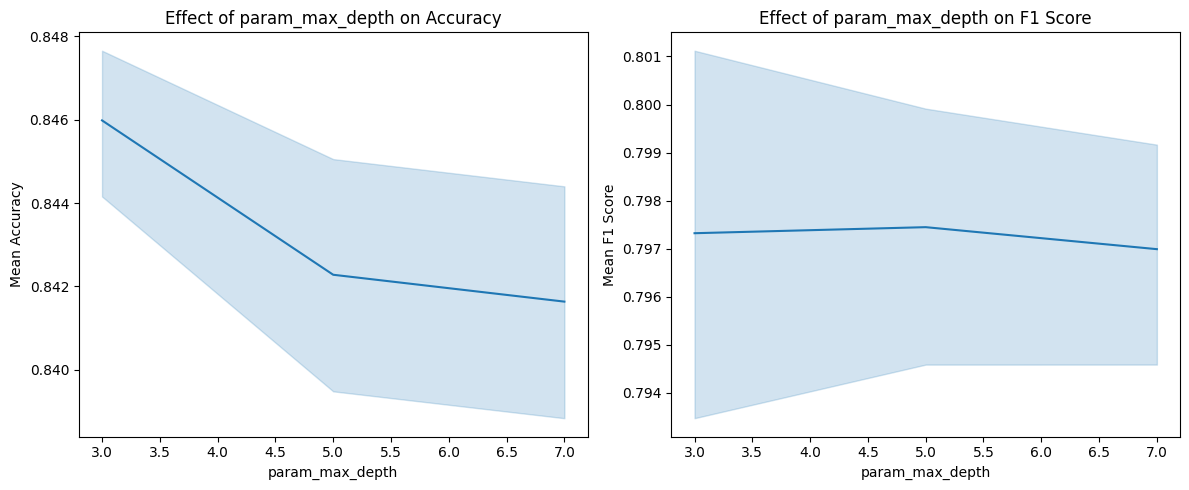

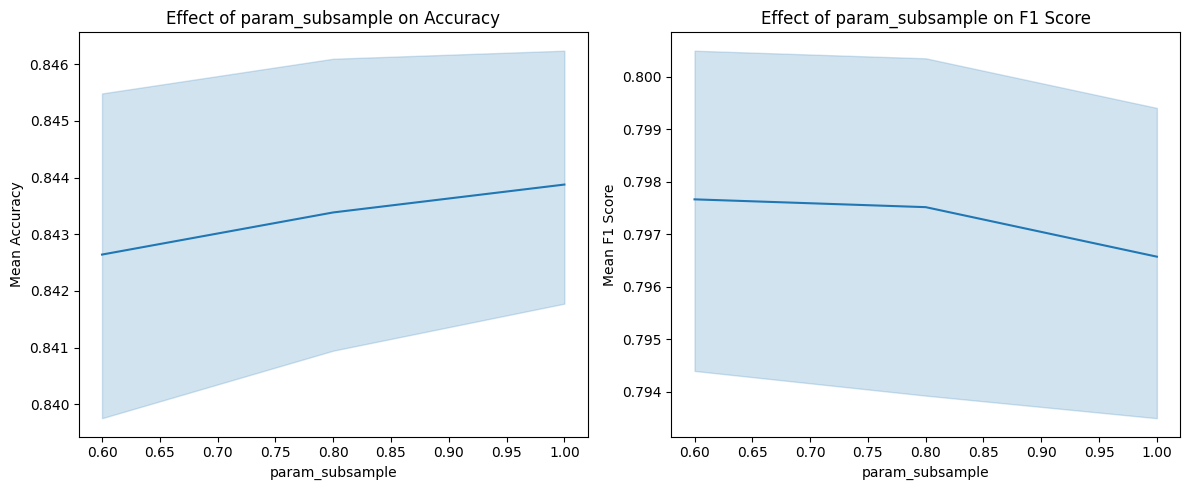

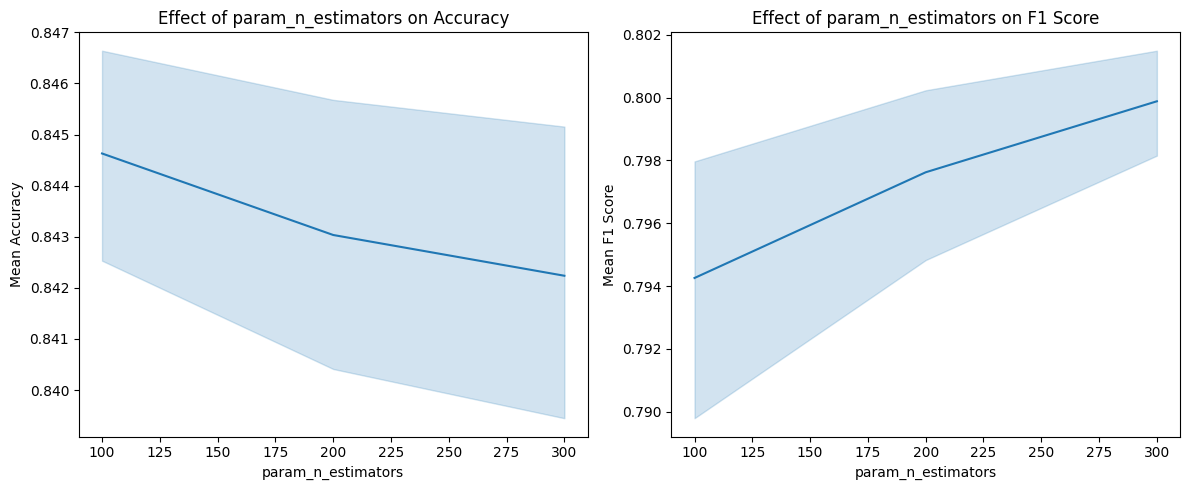

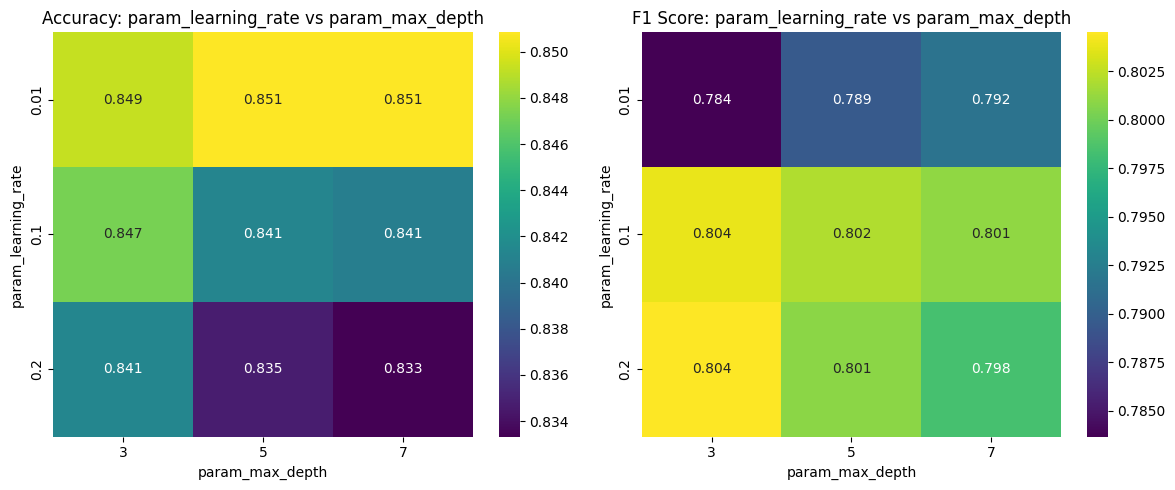

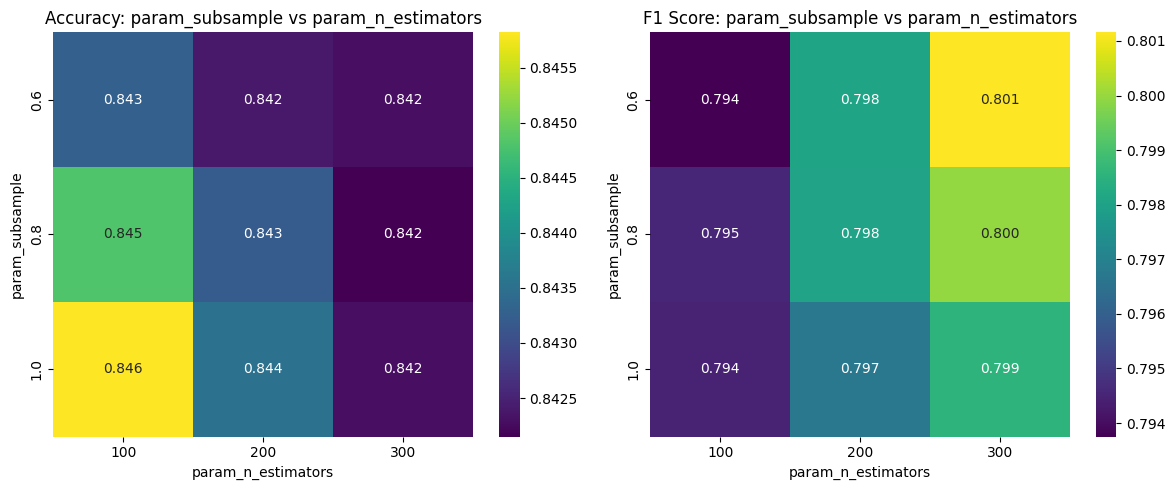

In [21]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]  # Added n_estimators to the grid
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=['accuracy', 'f1_weighted'], refit='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Convert results to a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Inspect the keys in cv_results_ to find the correct names for accuracy and F1 score
print(results.columns)

# Update the metric names based on the keys in cv_results_
accuracy_key = 'mean_test_accuracy' if 'mean_test_accuracy' in results.columns else 'mean_test_accuracy_score'
f1_key = 'mean_test_f1_weighted' if 'mean_test_f1_weighted' in results.columns else 'mean_test_f1_weighted_score'

# Plotting the effect of each hyperparameter on accuracy and F1 score
hyperparameters = ['param_learning_rate', 'param_max_depth', 'param_subsample', 'param_n_estimators']

for param in hyperparameters:
    plt.figure(figsize=(12, 5))

    # Plot for Accuracy
    plt.subplot(1, 2, 1)
    sns.lineplot(x=param, y=accuracy_key, data=results)
    plt.title(f'Effect of {param} on Accuracy')
    plt.xlabel(param)
    plt.ylabel('Mean Accuracy')

    # Plot for F1 Score
    plt.subplot(1, 2, 2)
    sns.lineplot(x=param, y=f1_key, data=results)
    plt.title(f'Effect of {param} on F1 Score')
    plt.xlabel(param)
    plt.ylabel('Mean F1 Score')

    plt.tight_layout()
    plt.show()

# Heatmaps for interactions between hyperparameters
interactions = [('param_learning_rate', 'param_max_depth'), ('param_subsample', 'param_n_estimators')]

for param1, param2 in interactions:
    plt.figure(figsize=(12, 5))

    # Heatmap for Accuracy
    plt.subplot(1, 2, 1)
    pivot_table = results.pivot_table(index=param1, columns=param2, values=accuracy_key)
    sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
    plt.title(f'Accuracy: {param1} vs {param2}')
    plt.xlabel(param2)
    plt.ylabel(param1)

    # Heatmap for F1 Score
    plt.subplot(1, 2, 2)
    pivot_table = results.pivot_table(index=param1, columns=param2, values=f1_key)
    sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
    plt.title(f'F1 Score: {param1} vs {param2}')
    plt.xlabel(param2)
    plt.ylabel(param1)

    plt.tight_layout()
    plt.show()